Udacity Data Scientist Nanodegree Project 1: Working through the CRISP-DM process
===============

# Introduction
The CRISP-DM or cross-industry standard process for data mining process is an open process model that allows us to carry out data mining using defined and systematic steps. This method was proven to be efficient while using data to provide insight and offer solutions for businesses.

This process comprises of six major phases that we will work through here:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

In the case of the Udacity Project here, we had to select a dataset before starting the CRISP-DM process. I decided to work with the Stackoverflow surveys data from 2019 to 2022.

## Business Understanding
This include questions that a business is asking and needs solutions for. 
My three main business questions are:

- What type of cloud platform should I invest my next months in?
- What coding languages are in demand?
- Predict my salary based on where I live?

In [1]:
## Data Understanding
### Looking at the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

df2022 = pd.read_csv('./survey_results_public2022.csv')

In [2]:
df2022.shape

(73268, 79)

In 2022, more than 73000 people answered the survey in Stackoverflow

In [3]:
#Let's take a look at the column headers
df2022.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [ ]:
There were a lot of questions answered but for my three questions, I will keep only a few features.
Let's first look at how the force response look like. There are a few questions that requires answers, which can be found in the survey result schema file.
- MainBranch
- Country
- Currency
- TBranch

In [37]:
df2022['MainBranch'].value_counts()

I am a developer by profession                                                   53507
I am learning to code                                                             6309
I am not primarily a developer, but I write code sometimes as part of my work     5794
I code primarily as a hobby                                                       4865
None of these                                                                     1497
I used to be a developer by profession, but no longer am                          1296
Name: MainBranch, dtype: int64

In [15]:
df2022['TBranch'].value_counts()

Yes    37200
No     15470
Name: TBranch, dtype: int64

In [17]:
df2022['TBranch'].isnull().sum()

20598

In [ ]:
### Countries that answered the survey


<AxesSubplot:>

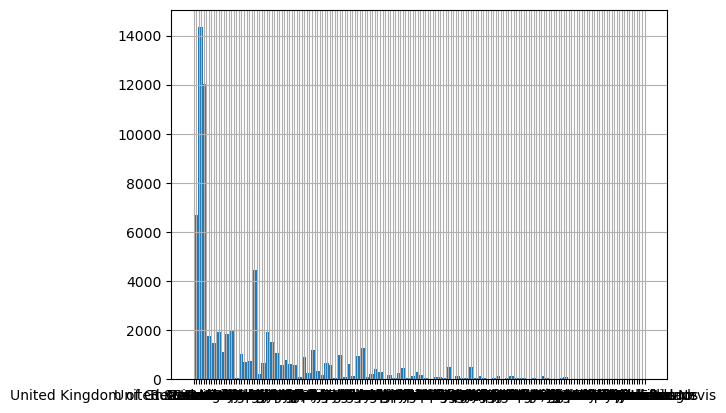

In [24]:
df2022['Country'].hist(bins=100)

In [ ]:
We can see that the survey was answered in majority by four countries above 4000 people. 


In [36]:
df2022['Country'].value_counts()

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: Country, Length: 180, dtype: int64

In [ ]:
#subsetting USA data since I want to know what are the trends in the Us specifically, since this is where I am looking for a job

In [104]:
df2022_US=df2022[df2022['Country']=='United States of America']
df2022_US.shape

(13543, 76)

## Question 1: What cloud platforms people want to learn?
To answer this question, we will compare the platforms participants currently work on and the ones they wish to learn how to use.

In [105]:
#taking a quick look at 'PlatformHaveWorkedWith'
df2022_US['PlatformHaveWorkedWith'].dropna().unique().tolist()

['Firebase;Microsoft Azure',
 'AWS;Microsoft Azure',
 'AWS',
 'AWS;DigitalOcean;Heroku',
 'Microsoft Azure',
 'AWS;Managed Hosting;Microsoft Azure',
 'AWS;Microsoft Azure;VMware',
 'Firebase;Google Cloud;Heroku',
 'Google Cloud;Microsoft Azure;VMware',
 'AWS;Firebase;Google Cloud',
 'AWS;Firebase;Google Cloud;Microsoft Azure',
 'AWS;Google Cloud;Managed Hosting;VMware',
 'AWS;Google Cloud',
 'AWS;Managed Hosting',
 'AWS;Google Cloud;IBM Cloud or Watson',
 'AWS;Firebase;Google Cloud;Heroku',
 'DigitalOcean;Microsoft Azure',
 'Google Cloud',
 'AWS;Google Cloud;Microsoft Azure',
 'AWS;DigitalOcean',
 'AWS;VMware',
 'AWS;DigitalOcean;Linode',
 'Google Cloud;Linode',
 'Colocation;Microsoft Azure;VMware',
 'Managed Hosting',
 'VMware',
 'AWS;Heroku',
 'DigitalOcean',
 'AWS;DigitalOcean;Microsoft Azure',
 'IBM Cloud or Watson',
 'AWS;DigitalOcean;Google Cloud;VMware',
 'Firebase',
 'AWS;Heroku;Linode;Microsoft Azure',
 'Microsoft Azure;VMware',
 'Google Cloud;Microsoft Azure',
 'Heroku',
 'AW

In [106]:
#taking a quick look at 'PlatformWantToWorkWith'
df2022_US['PlatformWantToWorkWith'].dropna().unique().tolist()

['Firebase;Microsoft Azure',
 'AWS;DigitalOcean;Firebase;Linode',
 'AWS',
 'Microsoft Azure',
 'AWS;Google Cloud',
 'Google Cloud',
 'AWS;Firebase;Google Cloud;Microsoft Azure',
 'AWS;Google Cloud;Managed Hosting;Microsoft Azure;OpenStack;VMware',
 'AWS;Managed Hosting',
 'DigitalOcean;Microsoft Azure',
 'Firebase',
 'Google Cloud;Oracle Cloud Infrastructure',
 'AWS;DigitalOcean',
 'AWS;Google Cloud;Microsoft Azure',
 'AWS;Microsoft Azure',
 'Linode',
 'Managed Hosting',
 'AWS;Google Cloud;Microsoft Azure;OpenStack;VMware',
 'DigitalOcean;Heroku',
 'AWS;DigitalOcean;Microsoft Azure',
 'Heroku',
 'AWS;Firebase;Google Cloud',
 'AWS;DigitalOcean;Google Cloud',
 'Linode;Microsoft Azure',
 'Colocation;VMware',
 'Google Cloud;Microsoft Azure',
 'AWS;Google Cloud;Heroku;Managed Hosting',
 'AWS;Linode',
 'DigitalOcean;Google Cloud',
 'DigitalOcean',
 'AWS;DigitalOcean;Firebase;Google Cloud;Heroku;Linode',
 'AWS;DigitalOcean;Firebase',
 'AWS;Firebase',
 'AWS;Firebase;Heroku;Microsoft Azure',
 '

In both columns the answers were select all that apply, and were put into one cell for each participant. In order to compare frequencies, I need to split the values for each cell and put them in a new row to count them.

In [137]:
#using the function explode() to separate each answers from cells with multiple platforms selected and creating a new row.
df2022_US_explode_currentplatforms = df2022_US.assign(platforms=df2022_US.PlatformHaveWorkedWith.str.split(';')).explode('platforms').reset_index(drop=True)


[Text(0, 0, 'AWS'),
 Text(1, 0, 'Microsoft Azure'),
 Text(2, 0, 'Google Cloud'),
 Text(3, 0, 'DigitalOcean'),
 Text(4, 0, 'Heroku'),
 Text(5, 0, 'Firebase'),
 Text(6, 0, 'VMware'),
 Text(7, 0, 'Linode'),
 Text(8, 0, 'Managed Hosting'),
 Text(9, 0, 'Colocation'),
 Text(10, 0, 'Oracle Cloud Infrastructure'),
 Text(11, 0, 'OpenStack'),
 Text(12, 0, 'IBM Cloud or Watson'),
 Text(13, 0, 'OVH')]

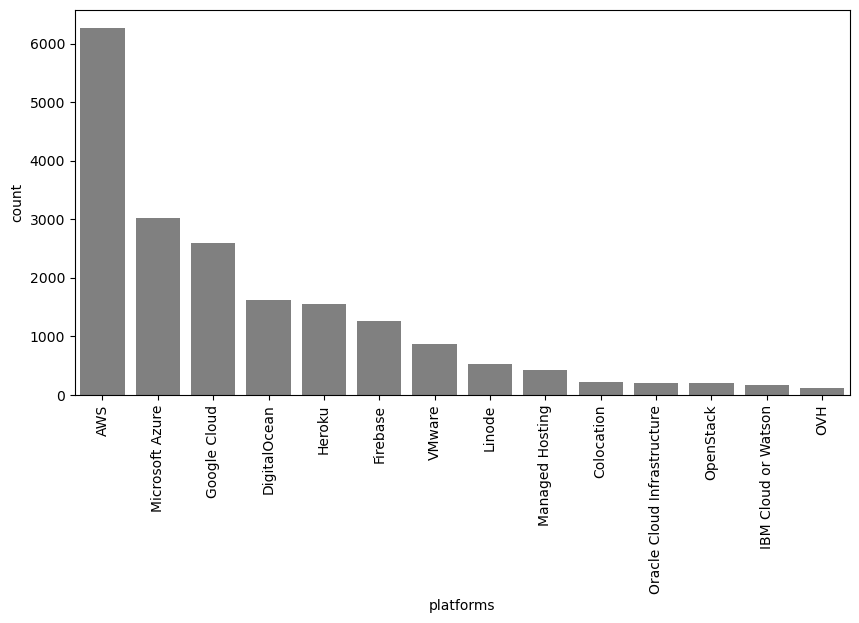

In [138]:
# making a histogram of counts for each platform using the new df for currently used platforms, and ordering from highest value count to lowest
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df2022_US_explode_currentplatforms,
    x='platforms',
    order=df2022_US_explode_currentplatforms['platforms'].value_counts().index,
    color='grey'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [139]:
# extracting the value counts for each platform
df2022_US_explode_currentplatforms['platforms'].dropna().value_counts()

AWS                            6262
Microsoft Azure                3013
Google Cloud                   2586
DigitalOcean                   1625
Heroku                         1554
Firebase                       1255
VMware                          872
Linode                          524
Managed Hosting                 430
Colocation                      216
Oracle Cloud Infrastructure     209
OpenStack                       201
IBM Cloud or Watson             168
OVH                             123
Name: platforms, dtype: int64

The big 5 cloud platforms that are being used are AWS, Microsoft Azure, Google Cloud, Digital Ocean, and Heroku

Now let's do the same for the platform that participants want to work with.

In [146]:
#using explode() to retrieve individual platforms in a row
df2022_US_explode_wantplatforms = df2022_US.assign(platforms=df2022_US.PlatformWantToWorkWith.str.split(';')).explode('platforms').reset_index(drop=True)


Text(0.5, 1.0, 'Platforms that participants want to learn about')

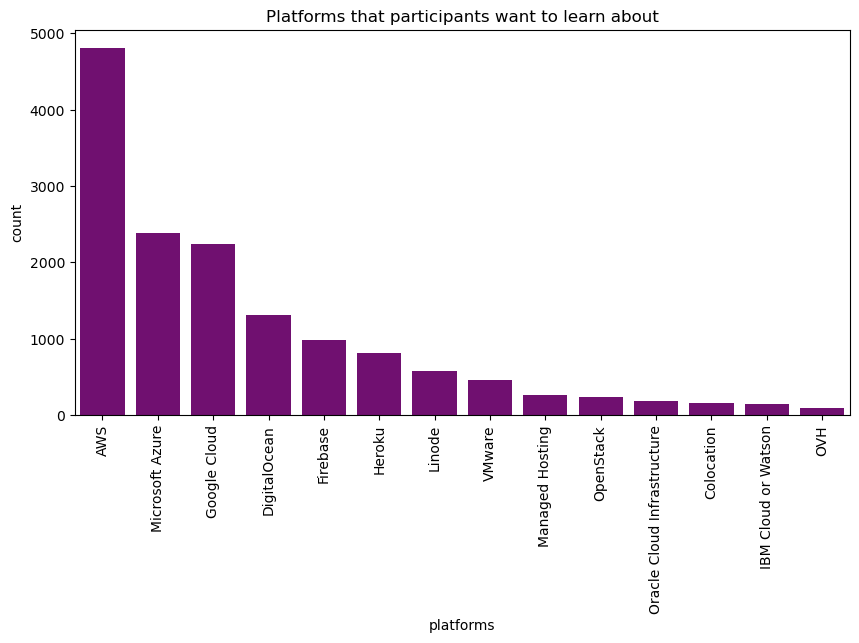

In [147]:
# building the histogram of platforms that people want to work with
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df2022_US_explode_wantplatforms,
    x='platforms',
    order=df2022_US_explode_wantplatforms['platforms'].value_counts().index,
    color='purple'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title("Platforms that participants want to work with")


In [148]:
#retrieving value counts
df2022_US_explode_wantplatforms['platforms'].dropna().value_counts()

AWS                            4806
Microsoft Azure                2380
Google Cloud                   2234
DigitalOcean                   1310
Firebase                        975
Heroku                          817
Linode                          574
VMware                          451
Managed Hosting                 263
OpenStack                       231
Oracle Cloud Infrastructure     176
Colocation                      150
IBM Cloud or Watson             140
OVH                              91
Name: platforms, dtype: int64

AWS is the most popular platform in terms of current usage and what participant want to learn. 

In [149]:
df2022_US_explode_wantplatforms['platforms'].dropna().value_counts()/df2022_US_explode_currentplatforms['platforms'].dropna().value_counts()

AWS                            0.767486
Colocation                     0.694444
DigitalOcean                   0.806154
Firebase                       0.776892
Google Cloud                   0.863882
Heroku                         0.525740
IBM Cloud or Watson            0.833333
Linode                         1.095420
Managed Hosting                0.611628
Microsoft Azure                0.789910
OVH                            0.739837
OpenStack                      1.149254
Oracle Cloud Infrastructure    0.842105
VMware                         0.517202
Name: platforms, dtype: float64

[Text(0, 0, 'AWS'),
 Text(1, 0, 'Microsoft Azure'),
 Text(2, 0, 'Google Cloud'),
 Text(3, 0, 'DigitalOcean'),
 Text(4, 0, 'Firebase'),
 Text(5, 0, 'Heroku'),
 Text(6, 0, 'Linode'),
 Text(7, 0, 'VMware'),
 Text(8, 0, 'Managed Hosting'),
 Text(9, 0, 'OpenStack'),
 Text(10, 0, 'Oracle Cloud Infrastructure'),
 Text(11, 0, 'Colocation'),
 Text(12, 0, 'IBM Cloud or Watson'),
 Text(13, 0, 'OVH')]

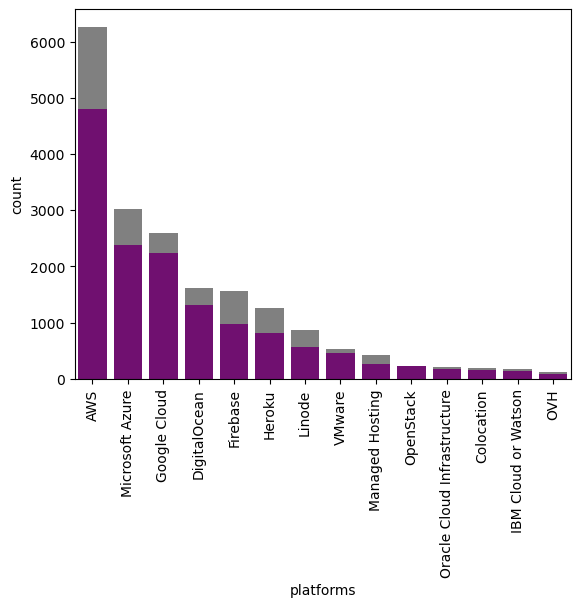

In [170]:
# putting plots next to each other
chart=sns.countplot(
    data=df2022_US_explode_currentplatforms,
    x='platforms',
    order=df2022_US_explode_currentplatforms['platforms'].value_counts().index,
    color='grey'
)
#chart1.set_xticklabels(chart.get_xticklabels(), rotation=90)

chart=sns.countplot(
    data=df2022_US_explode_wantplatforms,
    x='platforms',
    order=df2022_US_explode_wantplatforms['platforms'].value_counts().index,
    color='purple'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [223]:
ratio=(df2022_US_explode_wantplatforms['platforms'].dropna().value_counts()/df2022_US_explode_currentplatforms['platforms'].dropna().value_counts()-1)

ratio1=ratio.to_frame()
ratio1.head()


,platforms
AWS,-0.232514
Colocation,-0.305556
DigitalOcean,-0.193846
Firebase,-0.223108
Google Cloud,-0.136118


<AxesSubplot:title={'center':'What cloud platform participants want to use in 2022?'}>

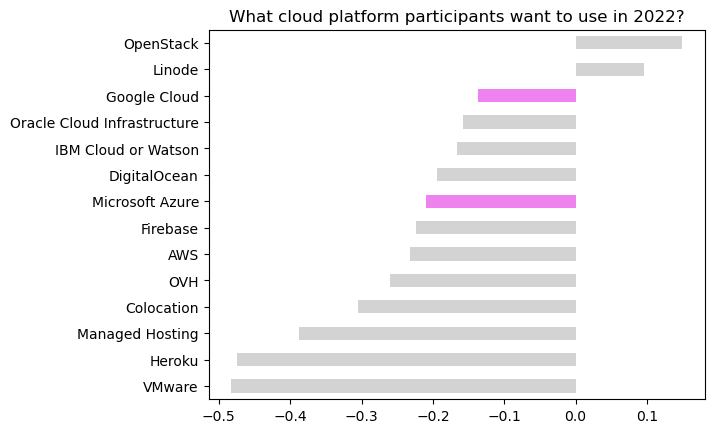

In [224]:
ratio1['platforms'].sort_values().plot(kind='barh',title="What cloud platform participants want to use in 2022?"
                         ,color =(ratio1['platforms'] > 0).map({True: 'violet',False: 'lightgrey'}))
#NB: not sure why I could not have positive values in purple and negative values in or

#### Conclusion the two main cloud platforms that could be trending are Openstack and Linode.

Let's focus on people who were coding as a profession and see if the trend is the same

In [154]:
df2022_US['MainBranch'].value_counts() # I want to subset by people who code as a profession

I am a developer by profession                                                   10288
I am not primarily a developer, but I write code sometimes as part of my work     1256
I code primarily as a hobby                                                       1060
I am learning to code                                                              673
I used to be a developer by profession, but no longer am                           266
Name: MainBranch, dtype: int64

In [155]:
df2022_USpro=df2022_US[df2022_US['MainBranch']=='I am a developer by profession']

In [156]:
df2022_USpro_explode_currentplatforms = df2022_USpro.assign(platforms=df2022_USpro.PlatformHaveWorkedWith.str.split(';')).explode('platforms').reset_index(drop=True)
df2022_USpro_explode_currentplatforms['platforms'].dropna().value_counts()

AWS                            5365
Microsoft Azure                2546
Google Cloud                   1983
DigitalOcean                   1309
Heroku                         1131
Firebase                        971
VMware                          607
Linode                          396
Managed Hosting                 317
Colocation                      168
OpenStack                       139
Oracle Cloud Infrastructure     126
IBM Cloud or Watson             109
OVH                              80
Name: platforms, dtype: int64

In [157]:
df2022_USpro_explode_wantplatforms = df2022_USpro.assign(platforms=df2022_USpro.PlatformWantToWorkWith.str.split(';')).explode('platforms').reset_index(drop=True)
df2022_USpro_explode_wantplatforms['platforms'].dropna().value_counts()

AWS                            4001
Microsoft Azure                1958
Google Cloud                   1724
DigitalOcean                   1027
Firebase                        735
Heroku                          575
Linode                          426
VMware                          286
Managed Hosting                 184
OpenStack                       165
Colocation                      105
Oracle Cloud Infrastructure      95
IBM Cloud or Watson              77
OVH                              55
Name: platforms, dtype: int64

In [162]:
ratio_pro=(df2022_USpro_explode_wantplatforms['platforms'].dropna().value_counts()/df2022_USpro_explode_currentplatforms['platforms'].dropna().value_counts()-1)

<AxesSubplot:title={'center':'What cloud platform has demand in the US in 2022 with people who code as a profession?'}>

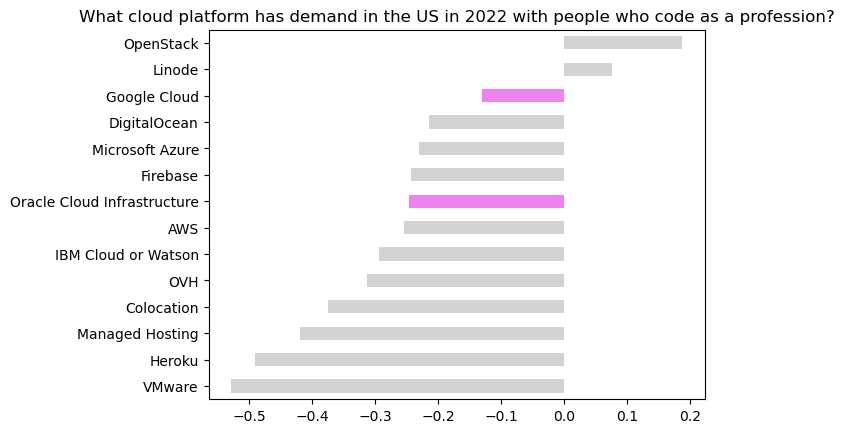

In [210]:
ratio_pro.sort_values().plot(kind='barh',
                             title="What cloud platform has demand in the US in 2022 with people who code as a profession?",
                            color =(ratio1['platforms'] > 0).map({True: 'violet',False: 'lightgrey'}))


The trend is the same if we only consider participant who code as a profession. 

## Question 2: what programming language should I learn?
In order to answer that question, I decided to examine
'LanguageHaveWorkedWith',
'LanguageWantToWorkWith'
'LearnCodeCoursesCert' -> to see what vertification stands out by coding language
'DevType' -> by dev type is an important 

Since I have filtered by country (USA) and by people who code as a profession, I will do the same here.

Let's take a look at the features I want to examine.

In [228]:
df2022_USpro.DevType.unique() # this one is tricky, let's put it aside for now. I could first explode Dev type, then subset by dev type and explode each language (cry emoji)


array(['Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test',
       'Developer, full-stack',
       'Developer, full-stack;Academic researcher;DevOps specialist', ...,
       'Data scientist or machine learning specialist;Developer, full-stack;Engineering manager;Product manager',
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Engineering manager;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;System administrator;Security professional',
       'Data scientist or machine learning specialist;Developer, back-end;Project manager;Data or business analyst'],
      dtype=object)

In [229]:
df2022_USpro.LanguageHaveWorkedWith.unique().tolist()

['C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript',
 'C;HTML/CSS;Rust;SQL;Swift;TypeScript',
 'HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala',
 'Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL',
 'C;C++',
 'C#;HTML/CSS;JavaScript;SQL',
 'C#;C++;HTML/CSS;JavaScript;SQL;TypeScript;VBA',
 'Java;JavaScript;PHP;SQL;TypeScript',
 'C#;HTML/CSS;JavaScript;SQL;TypeScript',
 'C#;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript',
 'Bash/Shell;C;Go;HTML/CSS;Java;JavaScript;Python;Swift;TypeScript',
 'C#;JavaScript;Python;SQL',
 'Bash/Shell;Java;Python;SQL',
 'Bash/Shell;HTML/CSS;JavaScript;PHP;TypeScript',
 'Bash/Shell;C;C++;Python',
 'C#;HTML/CSS;Java;JavaScript;Python;SQL;VBA',
 'JavaScript;SQL',
 'Python;SQL;VBA',
 'Bash/Shell;HTML/CSS;JavaScript;PHP;R;SQL',
 'Java;Python;SQL',
 'C#',
 'Bash/Shell;Go;JavaScript;Python;TypeScript',
 'C#;HTML/CSS;JavaScript;PowerShell;TypeScript',
 'C#;JavaScript;Perl;Python;Ruby;SQL',
 'Go;HTML/CSS;Java;JavaScript;Python;SQL',
 'C++;Go;Java;JavaScript;SQL;TypeScript',
 '

In [230]:
df2022_USpro.LanguageWantToWorkWith.unique()

array(['C#;Elixir;F#;Go;JavaScript;Rust;TypeScript',
       'Haskell;HTML/CSS;Rust;Swift', 'HTML/CSS;JavaScript;Python;Scala',
       ..., 'Bash/Shell;HTML/CSS;JavaScript;PowerShell;Python;TypeScript',
       'Bash/Shell;C++;HTML/CSS;JavaScript;Perl;Python;Rust;TypeScript',
       'C#;Java;Kotlin;Python;Scala;SQL;TypeScript'], dtype=object)

In [245]:
df2022_USpro.LearnCodeCoursesCert.unique()

array([nan, 'Pluralsight', 'Codecademy', 'Udemy;Codecademy;Pluralsight',
       'Udemy;Codecademy', 'Other', 'Codecademy;Pluralsight',
       'Coursera;Pluralsight', 'Codecademy;Other', 'Coursera;Udacity',
       'Udemy', 'Coursera;Other', 'Coursera;Codecademy;edX;Other',
       'Codecademy;Skillsoft', 'Coursera;edX',
       'Udemy;Codecademy;Pluralsight;Other', 'Udemy;Pluralsight;Other',
       'Codecademy;Pluralsight;Other', 'Udemy;Codecademy;Other',
       'Udemy;Pluralsight', 'Udemy;Skillsoft',
       'Coursera;Udemy;Codecademy;Pluralsight;edX;Udacity',
       'Coursera;Udemy', 'Coursera;Udemy;Codecademy', 'Coursera',
       'Coursera;Udemy;Pluralsight;edX',
       'Udemy;Codecademy;Pluralsight;Skillsoft', 'Pluralsight;edX',
       'Coursera;Udemy;Pluralsight;Other',
       'Coursera;Udemy;Codecademy;edX',
       'Udemy;Codecademy;Pluralsight;Udacity', 'Coursera;Codecademy',
       'Coursera;Udemy;edX;Other', 'Coursera;Pluralsight;edX',
       'Coursera;Codecademy;Udacity', 'Codeca

These features have the same challenge as platform features, so I have to use explode() to separate the values and get counts for each language. The plan: separate devtype into new rows, then subset by devtypes, then explode each language column to make counts per dev type.

In [231]:
df2022_USpro_explode_devtype = df2022_USpro.assign(devtype=df2022_USpro.DevType.str.split(';')).explode('devtype').reset_index(drop=True)


In [244]:
df2022_USpro_explode_devtype.head(3)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,devtype
0,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,"Developer, front-end"
1,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,"Developer, full-stack"
2,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,"Developer, back-end"


In [234]:
#checking that each dev type was separated
df2022_USpro_explode_devtype.devtype.unique().tolist()

['Developer, front-end',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, QA or test',
 'Academic researcher',
 'DevOps specialist',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Engineer, data',
 'Developer, mobile',
 'Database administrator',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Designer',
 'Marketing or sales professional',
 'Data scientist or machine learning specialist',
 'Security professional',
 'Project manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'Engineering manager',
 'System administrator',
 'Student',
 'Other (please specify):',
 'Scientist',
 nan,
 'Product manager',
 'Engineer, site reliability',
 'Educator',
 'Blockchain']

In [ ]:
I am interested in the Data scientist or machine learning specialist Dev type so lets subset by this dev type!

In [236]:
df2022_USpro_DS=df2022_USpro_explode_devtype[df2022_USpro_explode_devtype['devtype']=='Data scientist or machine learning specialist']
df2022_USpro_DS.shape

(532, 77)

Now from this subset of 532 data scientists, let look at the languages they are using and the ones they want to learn about.

<AxesSubplot:>

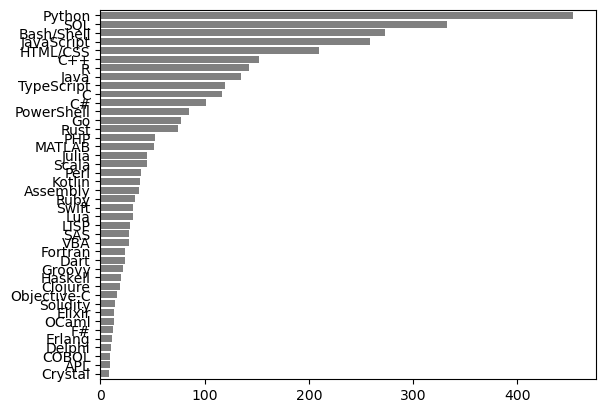

In [255]:
df2022_USpro_DS_explode_currentlanguage = df2022_USpro_DS.assign(language=df2022_USpro_DS.LanguageHaveWorkedWith.str.split(';')).explode('language').reset_index(drop=True)
df2022_USpro_DS_explode_currentlanguage['language'].value_counts().sort_values().plot(kind='barh', color='grey',width=0.8)

<AxesSubplot:>

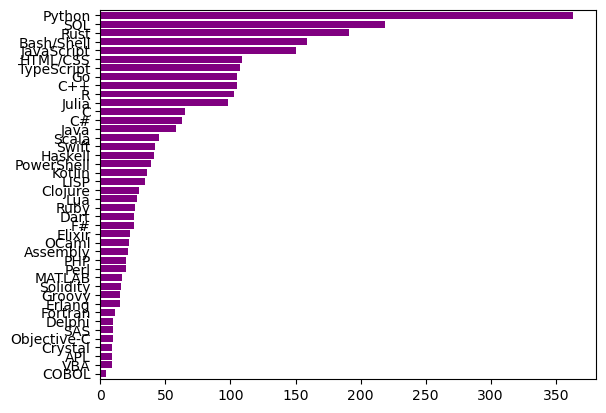

In [256]:
df2022_USpro_DS_explode_wantlanguage = df2022_USpro_DS.assign(language=df2022_USpro_DS.LanguageWantToWorkWith.str.split(';')).explode('language').reset_index(drop=True)
df2022_USpro_DS_explode_wantlanguage['language'].value_counts().sort_values().plot(kind='barh', color='purple',width=0.8)

In [261]:
ratio=(df2022_USpro_DS_explode_wantlanguage['language'].value_counts()/df2022_USpro_DS_explode_currentlanguage['language'].value_counts())-1

<AxesSubplot:title={'center':'Data Scientists and Machine Learning specialists wanted to learn these languages in 2022'}>

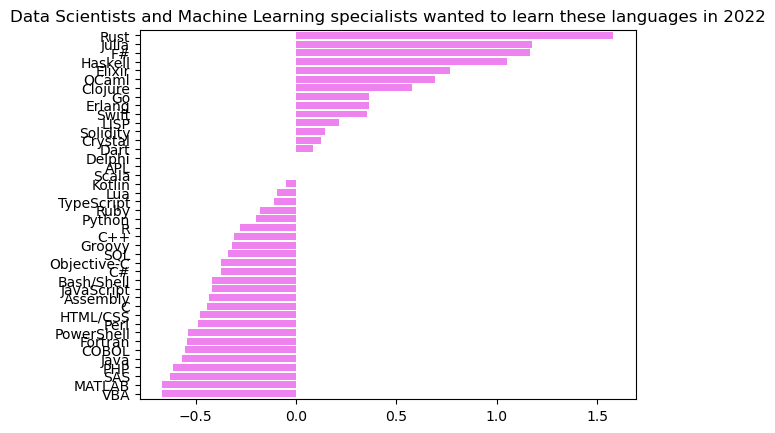

In [263]:
ratio.sort_values().plot(kind='barh', color='violet',width=0.8, title='Data Scientists and Machine Learning specialists wanted to learn these languages in 2022')

In [ ]:
I am also curious to know the languages data scientists want to learn by year of coding professionally. I am going to make age of coding experience plots by languages

<AxesSubplot:title={'center':'Distribution of years of coding experience in Data Scientists'}>

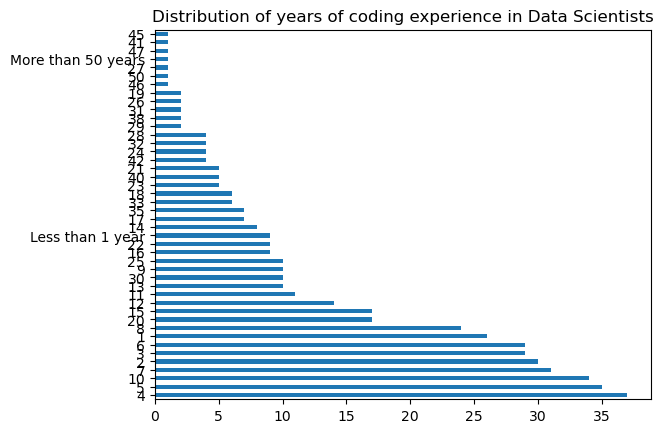

In [277]:
df2022_USpro_DS['YearsCodePro'].value_counts().plot(kind='barh', title='Distribution of years of coding experience in Data Scientists')

The majority of survey participants who are data scientists and machine learning specialists have between 1 and 10 years of experience 

In [280]:
df2022_USpro_DS_explode_wantlanguage.head(3)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,devtype,language
0,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,7,...,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0,Data scientist or machine learning specialist,Clojure
1,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,7,...,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0,Data scientist or machine learning specialist,Dart
2,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,7,...,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0,Data scientist or machine learning specialist,Go


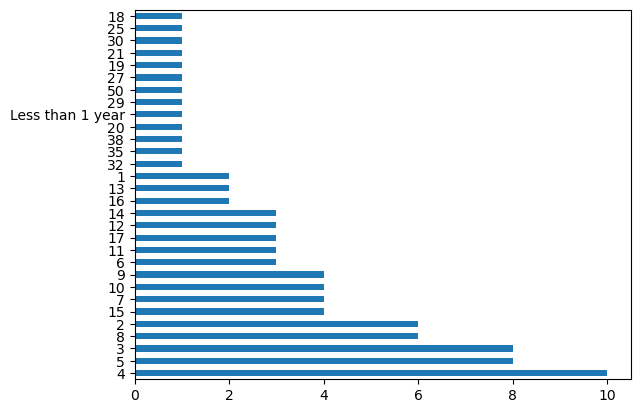

In [274]:
df2022_USpro_DS_explode_wantlanguage[df2022_USpro_DS_explode_wantlanguage['language']=='Julia']['YearsCodePro'].value_counts().plot(kind='barh')

In [313]:
#subset by the 3 top languages
ratio=df2022_USpro_DS_explode_wantlanguage['language'].value_counts()/df2022_USpro_DS_explode_currentlanguage['language'].value_counts()

ratio.sort_values(ascending=False)


Rust           2.581081
Julia          2.177778
F#             2.166667
Haskell        2.050000
Elixir         1.769231
OCaml          1.692308
Clojure        1.578947
Go             1.363636
Erlang         1.363636
Swift          1.354839
LISP           1.214286
Solidity       1.142857
Crystal        1.125000
Dart           1.083333
Scala          1.000000
APL            1.000000
Delphi         1.000000
Kotlin         0.947368
Lua            0.903226
TypeScript     0.891667
Ruby           0.818182
Python         0.801325
R              0.720280
C++            0.690789
Groovy         0.681818
SQL            0.659639
Objective-C    0.625000
C#             0.623762
Bash/Shell     0.582418
JavaScript     0.579151
Assembly       0.567568
C              0.555556
HTML/CSS       0.519048
Perl           0.512821
PowerShell     0.458824
Fortran        0.458333
COBOL          0.444444
Java           0.429630
PHP            0.384615
SAS            0.370370
MATLAB         0.333333
VBA            0

In [317]:
top=['Rust','Julia','F#','Haskell']
top_languages=df2022_USpro_DS_explode_wantlanguage[df2022_USpro_DS_explode_wantlanguage['language'].isin(top)]


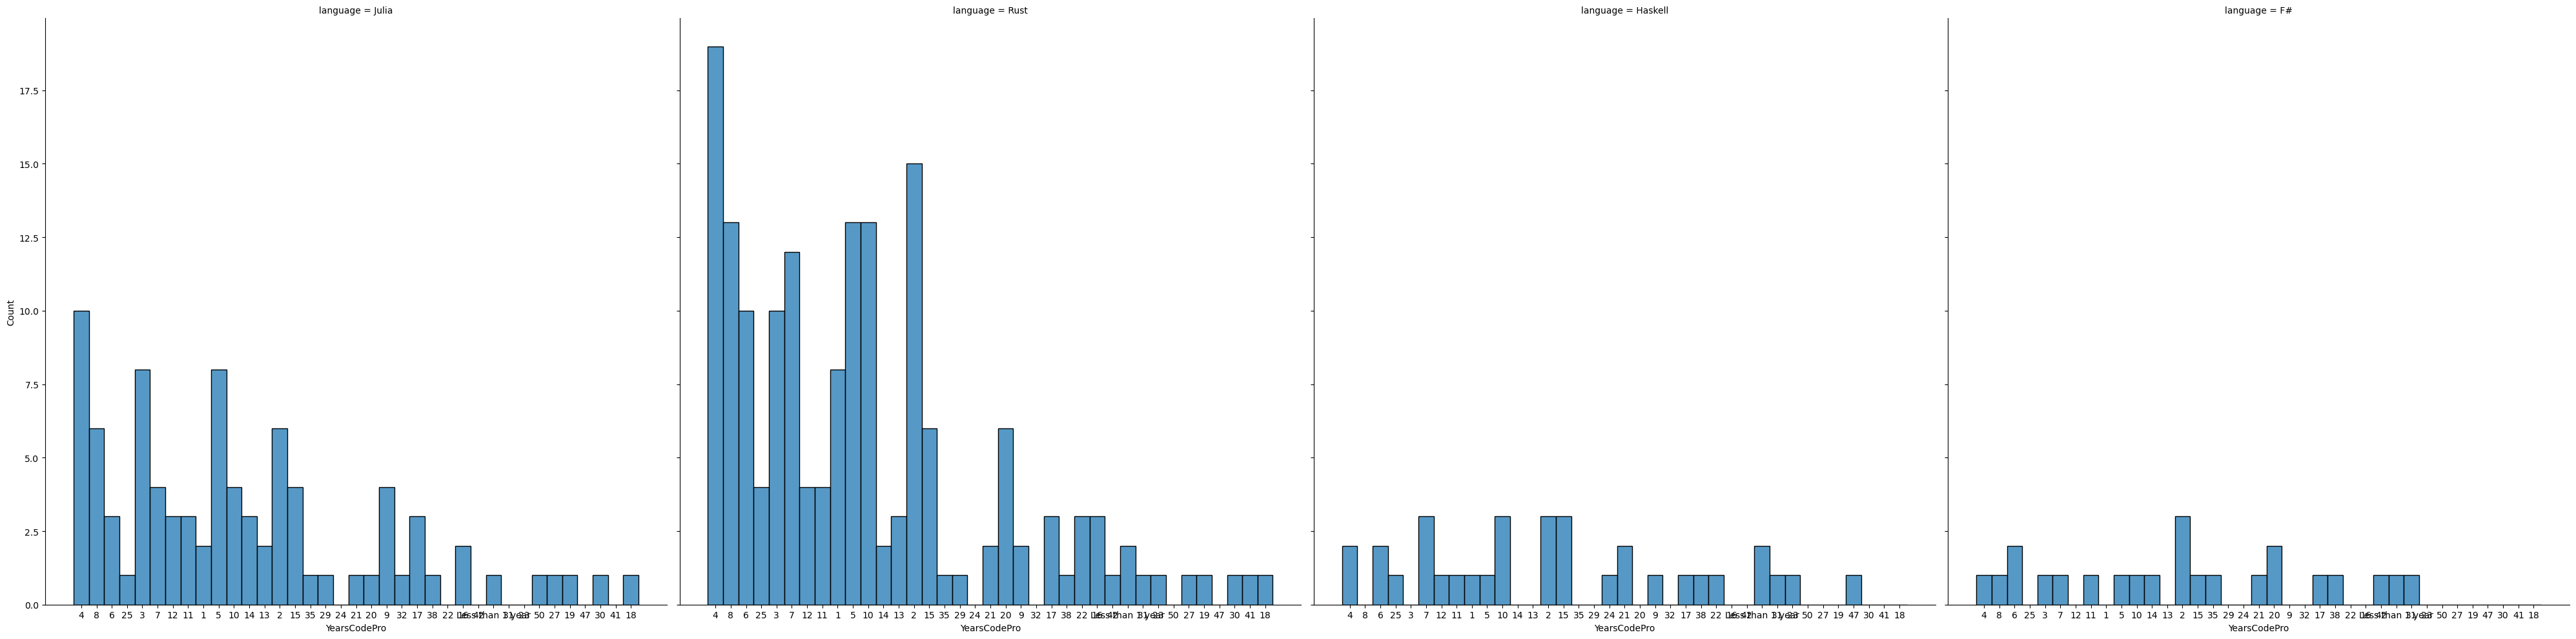

In [328]:
sns.displot(
    top_languages, x="YearsCodePro", col="language", 
    binwidth=3, height=10, facet_kws=dict()
)
#NB: this visual can be improved by reorder the years of experience

Conclusion: starting from 2 years of experience coding professionally, data scientist and machine learning specialists in the US want to learn other languages such as Rust and Julia

Since I am starting in data science and want to find a job, I want to see what languages people with one year or less coding professionally are using and what they want to learn

In [340]:
# subsetting less than one year experience participants
one=['Less than 1 year','1']
DS_one=df2022_USpro_DS[df2022_USpro_DS['YearsCodePro'].isin(one)]
DS_one.shape

(35, 77)

In [337]:
#lets explode() our languages columns and make plots
DS_one_explode_currentlanguage = DS_one.assign(language=DS_less.LanguageHaveWorkedWith.str.split(';')).explode('language').reset_index(drop=True)


(210, 78)

<AxesSubplot:>

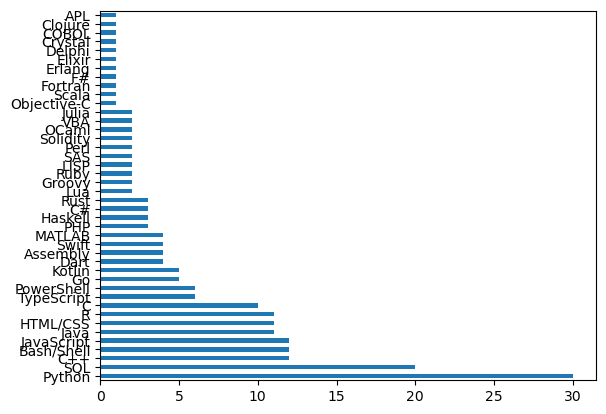

In [338]:
DS_one_explode_currentlanguage['language'].value_counts().plot(kind='barh')

Python and SQL are the most used languages then C++ and Bash/Shell

In [339]:
DS_one_explode_wantlanguage = DS_one.assign(language=DS_less.LanguageWantToWorkWith.str.split(';')).explode('language').reset_index(drop=True)


(165, 78)

<AxesSubplot:>

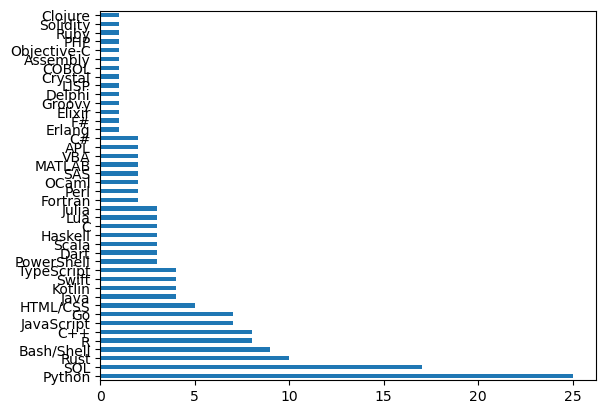

In [341]:
DS_one_explode_wantlanguage['language'].value_counts().plot(kind='barh')

<AxesSubplot:>

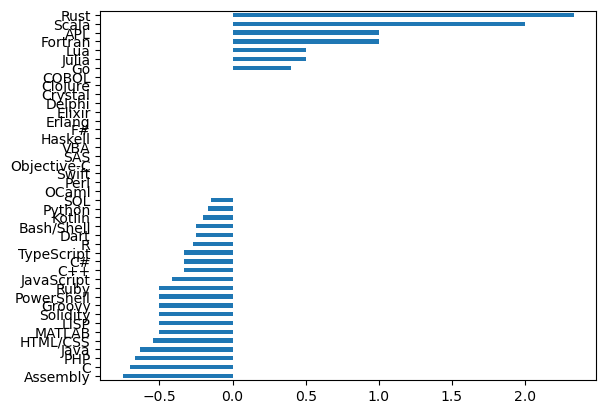

In [345]:
ratio_one=(DS_one_explode_wantlanguage['language'].value_counts()/DS_one_explode_currentlanguage['language'].value_counts())-1
ratio_one.sort_values().plot(kind='barh')

#### Conclusion: Rust and scala are the two top languages that need to be watched as an early career data scientist in the US.

# Question 3: Given a certain demographic situation, how much one is expected to earn as a data scientist in the US?


In [353]:
data_folks=['Data scientist or machine learning specialist']

df_data=df2022_USpro_explode_devtype[df2022_USpro_explode_devtype['devtype'].isin(data_folks)]
df_data.shape

(532, 77)

I made the decision to work with only participants that identified themselves having a data scientist role. there are in toal 532 survey participants in the US.

In [ ]:
### Target - Compensation

In [355]:
df_data['ConvertedCompYearly'].isnull().sum()

157

In [364]:
df_data_drop=df_data.dropna(subset=['ConvertedCompYearly'])

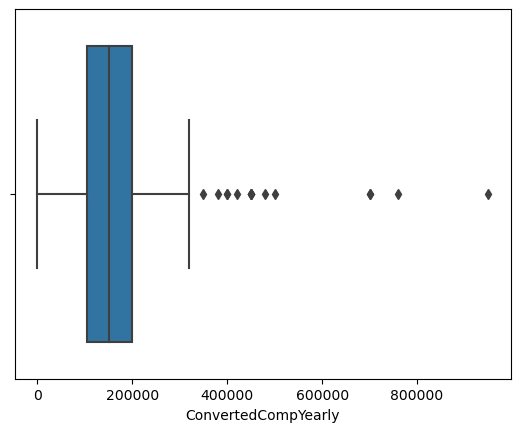

In [389]:
sns.boxplot(x='ConvertedCompYearly',
            data=df_data_drop[df_data_drop['ConvertedCompYearly']<=0.1e7])
plt.ticklabel_format(style='plain', axis='x')
# in the plot, I have removed outliers arbitrarily for salary above USD 1M 

To better visualize salary, I arbitraily removed compensation above USD 1M, even so, the distribution is quite skewed towards the left because of few very high yearly compensation

In [ ]:
df_data_drop.shape

<AxesSubplot:>

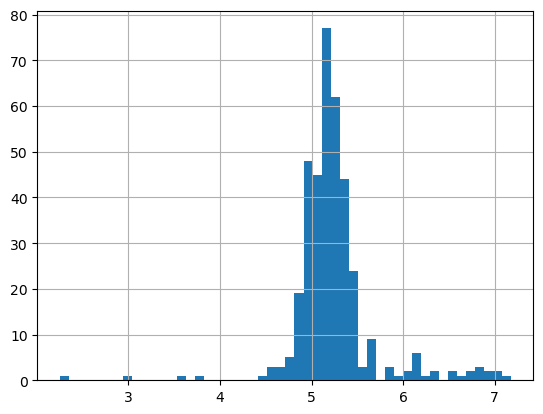

In [384]:
np.log10(df_data_drop['ConvertedCompYearly']).hist(bins=50)

In [ ]:
### Features 

In [385]:
df_data_drop.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    

In [63]:
df_dropna_target = df2022.dropna(subset=['ConvertedCompYearly'],axis=0)

In [64]:
df_dropna_target['Currency'].unique()
#I will only use US currency

array(['GBP\tPound sterling', 'ILS\tIsraeli new shekel',
       'EUR European Euro', 'USD\tUnited States dollar',
       'CZK\tCzech koruna', 'CAD\tCanadian dollar', 'PLN\tPolish zloty',
       'NOK\tNorwegian krone', 'TWD\tNew Taiwan dollar',
       'BRL\tBrazilian real', 'UYU\tUruguayan peso', 'SEK\tSwedish krona',
       'TRY\tTurkish lira', 'RON\tRomanian leu', 'SGD\tSingapore dollar',
       'INR\tIndian rupee', 'BGN\tBulgarian lev', 'RUB\tRussian ruble',
       'SAR\tSaudi Arabian riyal', 'KES\tKenyan shilling',
       'CHF\tSwiss franc', 'ZAR\tSouth African rand', 'THB\tThai baht',
       'CNY\tChinese Yuan Renminbi', 'DKK\tDanish krone',
       'AUD\tAustralian dollar', 'VND\tVietnamese dong',
       'ARS\tArgentine peso', 'HUF\tHungarian forint',
       'TND\tTunisian dinar', 'BDT\tBangladeshi taka',
       'MVR\tMaldivian rufiyaa', 'HKD\tHong Kong dollar',
       'MXN\tMexican peso', 'EGP\tEgyptian pound', 'RSD\tSerbian dinar',
       'PKR\tPakistani rupee', 'NPR\tNepalese ru

In [65]:
df_dropna_targetUS=df_dropna_target[df_dropna_target['Currency']=='USD\tUnited States dollar']

In [66]:
df_dropna_targetUS.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
11,12,"I am not primarily a developer, but I write co...","Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,12,...,30-60 minutes a day,60-120 minutes a day,Just right,Innersource initiative;DevOps function;Microse...,Yes,Yes,No,Too short,Easy,194400.0
12,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12,...,30-60 minutes a day,Less than 15 minutes a day,Somewhat short,DevOps function;Microservices,Yes,No,Yes,Appropriate in length,Easy,65000.0
14,15,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow;Video-based O...,NaN,11,...,30-60 minutes a day,30-60 minutes a day,Somewhat long,DevOps function;Continuous integration (CI) an...,No,Yes,Yes,Appropriate in length,Easy,110000.0
26,27,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,106960.0
28,29,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,30-60 minutes a day,15-30 minutes a day,Somewhat long,Developer portal or other central places to fi...,Yes,Yes,No,Appropriate in length,Easy,130000.0


Finally, to examine compensation, I need to use the column 'ConvertedCompYearly' which is the annual compensation for people who disclosed their compensation. Since some people provided compensation by month or week, it was adjusted in the dataset.

In here, I will focus on data with converted yearly compensation in the US

<AxesSubplot:>

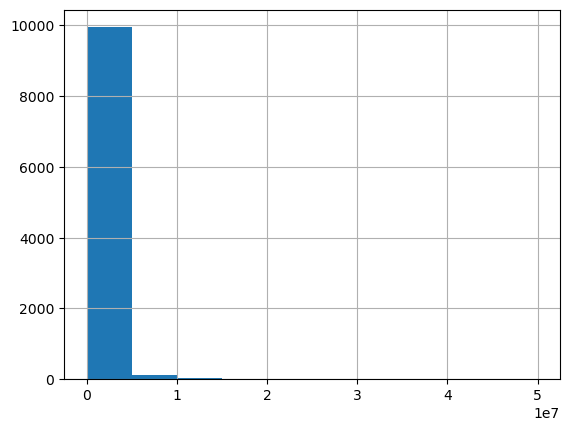

(8418, 79)

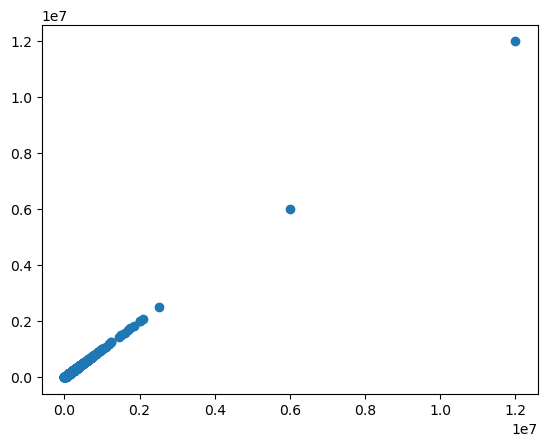

<AxesSubplot:xlabel='ConvertedCompYearly'>

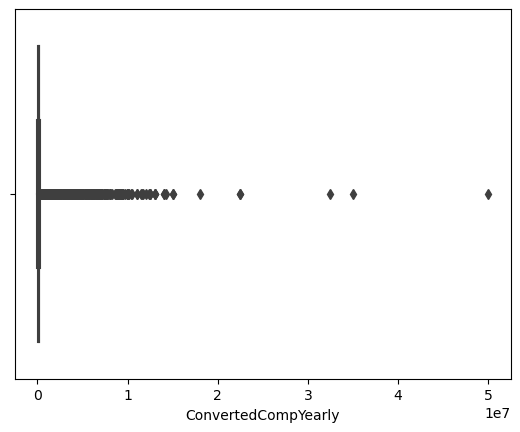

In [102]:
sns.boxplot(x='ConvertedCompYearly',
            data=df_dropna_targetUS)

In [ ]:
sns.boxplot(x='ConvertedCompYearly',
            data=df_dropna_targetUS)

Most of the compensation lie on the left side of the plot so I will remove the few very high compensation and consider them as outliers. From the boxplot, I will say over 2e7

<AxesSubplot:xlabel='ConvertedCompYearly'>

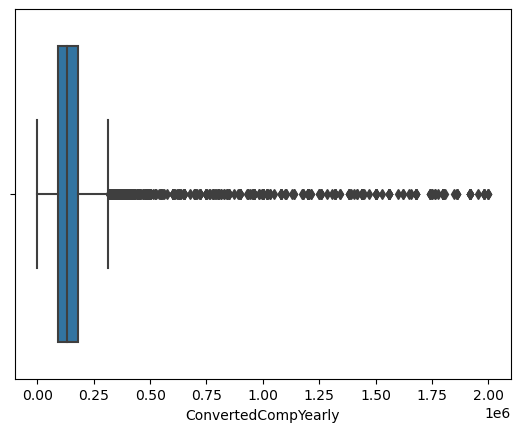

In [109]:

sns.boxplot(x='ConvertedCompYearly',
            data=df_dropna_targetUS[df_dropna_targetUS['ConvertedCompYearly']<=0.2e7])

<AxesSubplot:>

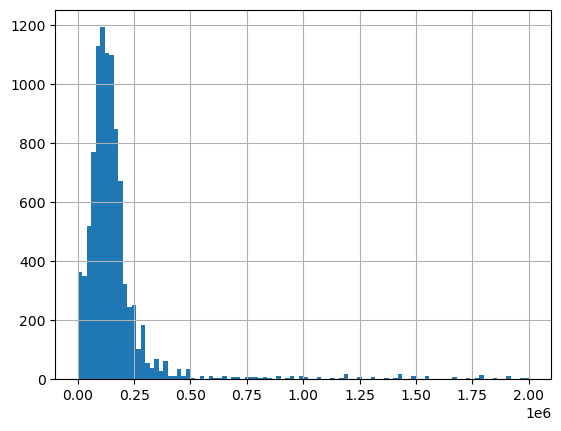

In [121]:
#look at the histogram
df_dropna_targetUS[df_dropna_targetUS['ConvertedCompYearly']<=0.2e7]['ConvertedCompYearly'].hist(bins=100)

In [122]:
df_dropna_targetUS[df_dropna_targetUS['ConvertedCompYearly']<=0.2e7].describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,9799.000000,9.799000e+03,0.0,0.0,6874.000000,9.799000e+03
mean,36462.400041,1.392258e+05,NaN,NaN,12.877219,1.714767e+05
std,21021.696360,1.136552e+05,NaN,NaN,9.909281,2.073598e+05
min,12.000000,1.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,16437.500000,8.500000e+04,NaN,NaN,5.000000,9.000000e+04
50%,39134.000000,1.292500e+05,NaN,NaN,10.000000,1.310000e+05
75%,53541.500000,1.750000e+05,NaN,NaN,18.000000,1.800000e+05
max,73120.000000,2.000000e+06,NaN,NaN,50.000000,2.000000e+06


TypeError: boxplot() got an unexpected keyword argument 'groupby'

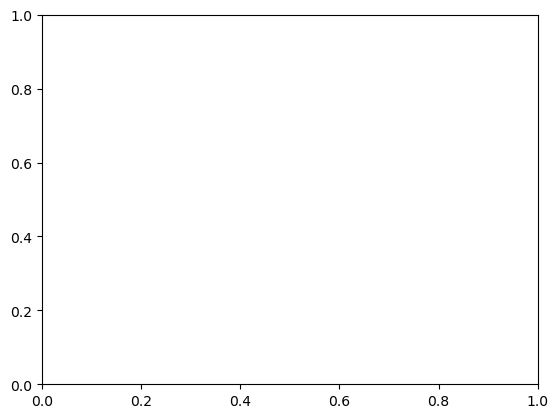

In [115]:

my_palette = {"GROUP_A": 'Greys', "GROUP_B": 'Reds', "GROUP_C": 'Blues', "GROUP_D": 'Greens'}

for ind, g in enumerate(groups):
    sns.swarmplot(x="group", y="value", data=data[data.group == g], order=groups,
                  palette=my_palette[g], hue="replicate")
    sns.swarmplot(x="group", y="value", data=avgs[avgs.group == g], order=groups,
                  size=8, palette=my_palette[g], hue="replicate", edgecolor="k", linewidth=2)

# plt.gca().legend_.remove() # optionally suppress the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:3], title='replicate')
plt.tight_layout()
plt.show()

In [26]:
other variables to look at

array([nan, 'Yearly', 'Monthly', 'Weekly'], dtype=object)

'CodingActivities'
'DevType'
'PurchaseInfluence'
'BuyNewTool'
'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm',
       'TBranch', 'ICorPM', 
       'WorkExp'

In [6]:
df2022['MainBranch'].unique()

array(['None of these', 'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby', 'I am learning to code',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

From a first overview of the headers, I want to keep the following columns for sure

In [ ]:
df_keep=df2022['ConvertedCompYearly','Employment', 'RemoteWork','EdLevel', 'LearnCode', 'LearnCodeOnline','LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType','Country', 'Currency','CompTotal', 'CompFreq','Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
       'Accessibility', 'MentalHealth']

In [ ]:
### My three main questions

In [ ]:
# Data Preparation

In [ ]:
## Selected features

In [ ]:
## Missing data

In [ ]:
# Modeling

In [ ]:
# Evaluation

In [ ]:
# Deployment


Resources used for this project:
- https://medium.com/towards-data-science/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c 
- https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining